In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trees_df = pd.read_csv(".\data\p2-arbres-fr.csv", delimiter=";")
trees_df.head(3)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061


In [4]:
print(trees_df["stade_developpement"].unique())

def rename_cells(cell):
    stade = cell["stade_developpement"]
    if stade == "A":
        return "Adulte"
    elif stade == "M":
        return "Mature"
    elif stade == 'J':
        return "Jeune"
    elif stade == "JA":
        return "Jeune Adulte"

trees_df["stade_developpement"] = trees_df.apply(rename_cells, axis=1)
trees_df.head(3)

[nan 'A' 'J' 'M' 'JA']


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,None,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,Adulte,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,Adulte,NaN,48.857705,2.321061


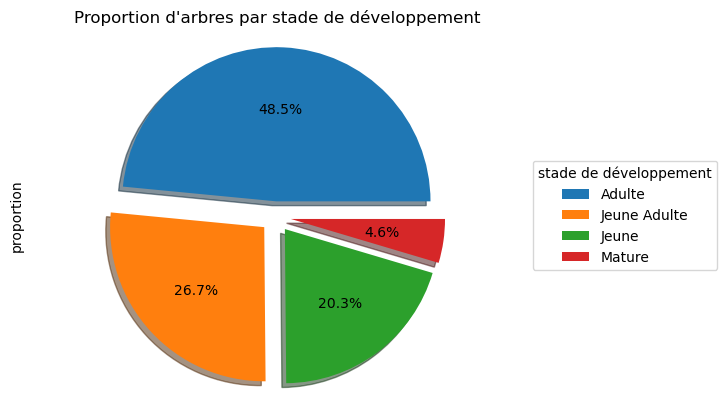

In [5]:
def plot_pie_chart(data, column_info):
    """
    Plot a pie chart for the given column in the DataFrame.

    Parameters:
        data (DataFrame): Input DataFrame containing the data.
        column_info (dict): Dictionary containing column information.
            Keys:
                'name' (str): Name of the column to plot.
                'label' (str): Label of the column.
                'categories' (list): List of categories for the legend.
    """
    sns.set_palette("tab10")
    column_name = column_info['name']
    column_label = column_info['label']
    categories = column_info['categories']
    subset = data[column_name].value_counts(normalize=True)
    subset = subset[subset.index.isin(categories)]
    #plot the pie chart
    subset.plot.pie(autopct='%1.1f%%', shadow=True, labeldistance=None, explode=[0.1]*len(subset))
    plt.title("Proportion d'arbres par " + column_label)
    plt.axis('equal')
    plt.legend(title=column_label, labels=categories, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

column_info = {
    'name': "stade_developpement",
    'label': "stade de développement",
    'categories': ["Adulte", "Jeune Adulte", "Jeune", "Mature"]
}

plot_pie_chart(trees_df, column_info)

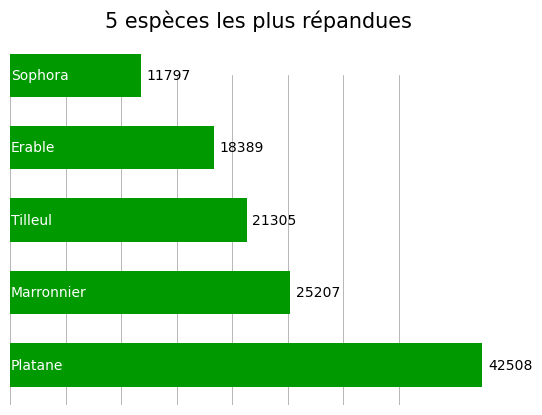

In [6]:
#Les espèces présentes


def plot_top_species_barh(data, top_k=5, title_font_size=15):
    top_species = data['libelle_francais'].value_counts().nlargest(top_k)
    
    for x in range(0, 35001, 5000):    
        plt.plot([x] * (top_k + 1), range(-1, top_k), "-", lw=0.5, color="black", alpha=0.4, zorder=0)
    
    top_species.plot(kind='barh', color="#009900", legend=False, width=0.6)

    plt.title(f"{top_k} espèces les plus répandues", fontsize=title_font_size)

    for i, (species, count) in enumerate(zip(top_species.index, top_species)):
        plt.text(s=species, x=100, y=i, color="white", verticalalignment="center")
        plt.text(s=str(count), x=count + 500, y=i, color="black", verticalalignment="center", horizontalalignment="left")

    plt.axis("off")
    plt.show()

plot_top_species_barh(trees_df)

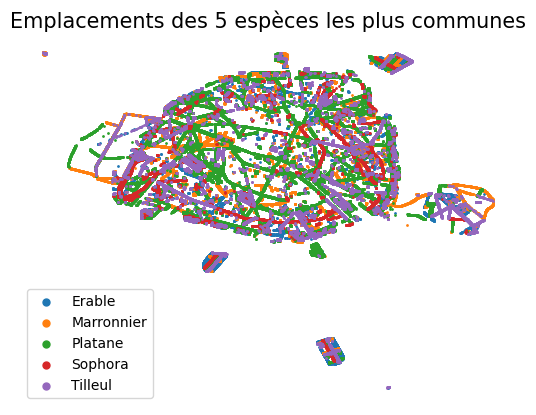

In [7]:
#Emplacement geographique des arbres

def plot_species_locations(df, top_k=5):
    df_top_species = df['libelle_francais'].value_counts().nlargest(top_k)
    species_names = df_top_species.index
    filtered_df = df[df['libelle_francais'].isin(species_names)]
    groups = filtered_df.groupby('libelle_francais')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Localisations des " + str(top_k) + " espèces les plus communes"), fontsize=15)
    plt.legend(loc = 'lower left', markerscale=5 )
    plt.axis('off')
    plt.show()


plot_species_locations(trees_df, top_k=5)

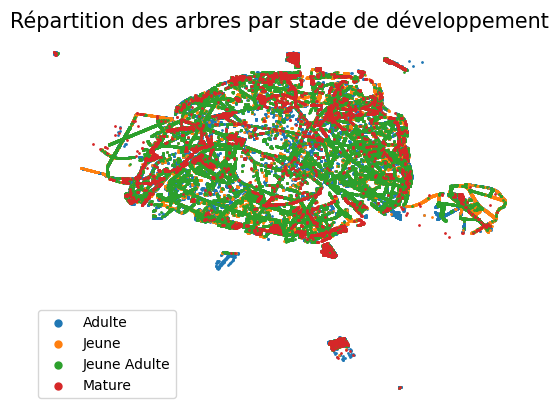

In [12]:
# Age des arbres

def plot_ages(trees_df):
    groups = trees_df.groupby('stade_developpement')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Répartition des arbres par stade de développement"), fontsize=15)
    plt.legend(loc = 'lower left', markerscale=5 )
    plt.axis('off')
    plt.show()

plot_ages(trees_df)


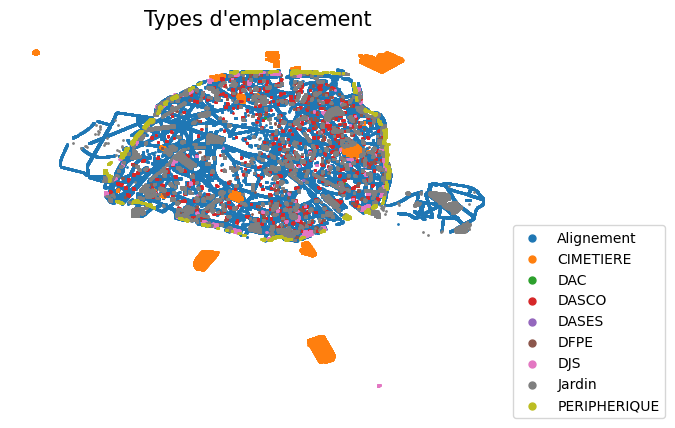

In [24]:
def plot_type_emplacement(df):
    groups = df.groupby('domanialite')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Types d'emplacement"), fontsize=15)
    plt.legend( markerscale=5, bbox_to_anchor=(1, 0.5))
    plt.axis('off')
    plt.show()

plot_type_emplacement(trees_df)
